# Task: Analysis of the historical trajectory of the “openedx/edx-platform"

## Step 1 - Import the packages and do some tests

In [17]:
var openDigger = require('../src/open_digger');
var table_name = "github_log.events"
var repo_id = "10391073"

In [2]:
var query = openDigger.driver.clickhouse.query;

query(
    `SHOW DATABASES`
).then(res=>{ 
    console.log(res);
})

[
  { name: '_temporary_and_external_tables' },
  { name: 'default' },
  { name: 'github_log' },
  { name: 'system' }
]


In [3]:
query(    
    `SHOW TABLES from github_log`
).then(res=>{    
    console.log(res);
})

[ { name: 'events' } ]


## Step 2 - Start the analysis task

In [4]:
// prepare the time array
var startYear = 2015, endYear = 2021;

var years = [];
for (var y = startYear; y <= endYear; y++) {
    years.push(y);
}

var startMonth = 1, endMonth = 12;

var months = [];
for (var m = startMonth; m <= endMonth; m++) {
    months.push(m);
}

// prepare the x-axis data
var timeArray = []
for(var i = 0; i < years.length; i++) {
    for (var j = 0; j < months.length; j++) {
        timeArray.push(years[i].toString() + '-' + months[j].toString());
    }
}

// untill 2022-04
// timeArray = timeArray.slice(0, -8)
// 
console.log(timeArray)

[
  '2015-1',  '2015-2',  '2015-3',  '2015-4',  '2015-5',
  '2015-6',  '2015-7',  '2015-8',  '2015-9',  '2015-10',
  '2015-11', '2015-12', '2016-1',  '2016-2',  '2016-3',
  '2016-4',  '2016-5',  '2016-6',  '2016-7',  '2016-8',
  '2016-9',  '2016-10', '2016-11', '2016-12', '2017-1',
  '2017-2',  '2017-3',  '2017-4',  '2017-5',  '2017-6',
  '2017-7',  '2017-8',  '2017-9',  '2017-10', '2017-11',
  '2017-12', '2018-1',  '2018-2',  '2018-3',  '2018-4',
  '2018-5',  '2018-6',  '2018-7',  '2018-8',  '2018-9',
  '2018-10', '2018-11', '2018-12', '2019-1',  '2019-2',
  '2019-3',  '2019-4',  '2019-5',  '2019-6',  '2019-7',
  '2019-8',  '2019-9',  '2019-10', '2019-11', '2019-12',
  '2020-1',  '2020-2',  '2020-3',  '2020-4',  '2020-5',
  '2020-6',  '2020-7',  '2020-8',  '2020-9',  '2020-10',
  '2020-11', '2020-12', '2021-1',  '2021-2',  '2021-3',
  '2021-4',  '2021-5',  '2021-6',  '2021-7',  '2021-8',
  '2021-9',  '2021-10', '2021-11', '2021-12'
]


###　1. How many stars / forks did it increase monthly?

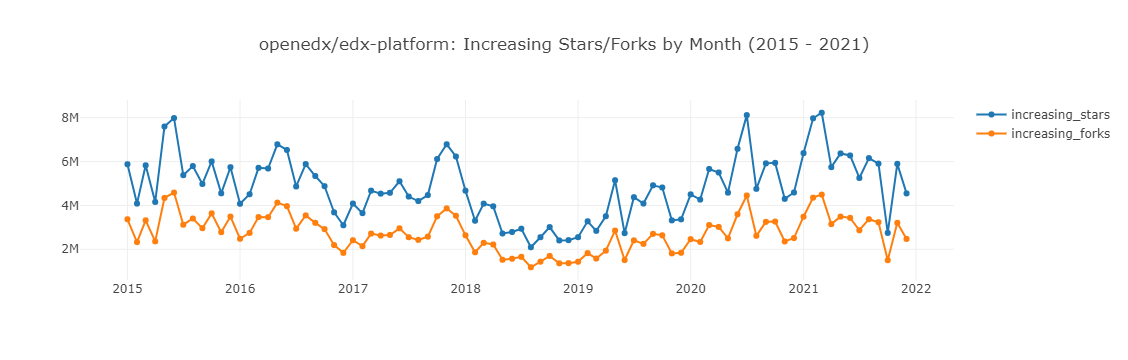

┌─────────┬───────────┬──────────────────┬──────────────────┐
│ (index) │   Time    │ Increasing Stars │ Increasing Forks │
├─────────┼───────────┼──────────────────┼──────────────────┤
│    0    │ '2015-1'  │    '5877776'     │    '3368512'     │
│    1    │ '2015-2'  │    '4083246'     │    '2328443'     │
│    2    │ '2015-3'  │    '5828803'     │    '3320760'     │
│    3    │ '2015-4'  │    '4158688'     │    '2361753'     │
│    4    │ '2015-5'  │    '7597694'     │    '4340347'     │
│    5    │ '2015-6'  │    '7983029'     │    '4585364'     │
│    6    │ '2015-7'  │    '5378945'     │    '3120715'     │
│    7    │ '2015-8'  │    '5794771'     │    '3402901'     │
│    8    │ '2015-9'  │    '4978050'     │    '2963197'     │
│    9    │ '2015-10' │    '6007495'     │    '3638629'     │
│   10    │ '2015-11' │    '4551878'     │    '2780114'     │
│   11    │ '2015-12' │    '5742403'     │    '3492136'     │
│   12    │ '2016-1'  │    '4074540'     │    '2479702'     │
│   13  

In [5]:
query( 
        `SELECT sum(repo_stargazers_count) as increasing_stars, sum(repo_forks_count) as increasing_forks, toYear(created_at) as year, toMonth(created_at) as month 
        FROM ${table_name}
        where (repo_id == ${repo_id})
        group by toYear(created_at), toMonth(created_at)
        order by year, month`
    ).then(data => {
    // 直接打印数据
    // console.log(data);  
    var increasing_stars = [], increasing_forks = [], tableArray = []
    data.forEach((d, i) => {
        increasing_stars.push(d.increasing_stars);
        increasing_forks.push(d.increasing_forks);
        tableArray.push({"Time": d.year+"-"+d.month, "Increasing Stars": d.increasing_stars,  "Increasing Forks": d.increasing_forks})
    })
   
    // 使用 Plotly 绘图
    plot_stars = {x: timeArray, y: increasing_stars, mode: 'lines+markers',  name: 'increasing_stars'}
    plot_forks = {x: timeArray, y: increasing_forks, mode: 'lines+markers',  name: 'increasing_forks'}
    figure_info = {
        title: `openedx/edx-platform: Increasing Stars/Forks by Month (${startYear} - ${endYear})`, 
        // yaxis: {type: 'log'}
    }; 
    
    openDigger.render.plotly([plot_stars, plot_forks], figure_info)
         
    // 打印表格
    console.table(tableArray)
});

###　2. How many issues are opened / closed montly?

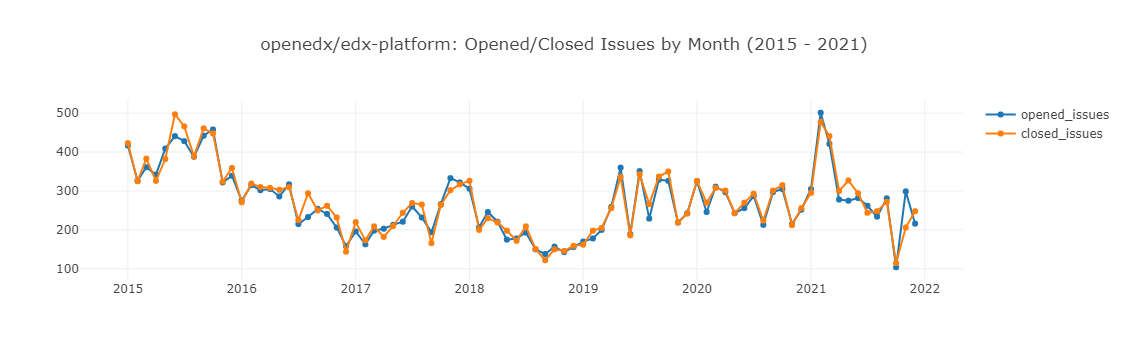

┌─────────┬───────────┬───────────────┬───────────────┐
│ (index) │   Time    │ Opened Issues │ Closed Issues │
├─────────┼───────────┼───────────────┼───────────────┤
│    0    │ '2015-1'  │     '417'     │     '423'     │
│    1    │ '2015-2'  │     '326'     │     '325'     │
│    2    │ '2015-3'  │     '361'     │     '383'     │
│    3    │ '2015-4'  │     '342'     │     '326'     │
│    4    │ '2015-5'  │     '409'     │     '382'     │
│    5    │ '2015-6'  │     '441'     │     '497'     │
│    6    │ '2015-7'  │     '428'     │     '466'     │
│    7    │ '2015-8'  │     '388'     │     '389'     │
│    8    │ '2015-9'  │     '442'     │     '461'     │
│    9    │ '2015-10' │     '458'     │     '448'     │
│   10    │ '2015-11' │     '322'     │     '324'     │
│   11    │ '2015-12' │     '339'     │     '359'     │
│   12    │ '2016-1'  │     '275'     │     '271'     │
│   13    │ '2016-2'  │     '315'     │     '319'     │
│   14    │ '2016-3'  │     '302'     │     '310

In [6]:
query(
        `SELECT sum(if(action='opened',1,0)) as opened_issues, 
        sum(if(action='closed',1,0)) as closed_issues, 
        toYear(created_at) as year, 
        toMonth(created_at) as month 
        FROM ${table_name}
        where (repo_id == ${repo_id})

        group by toYear(created_at), toMonth(created_at)
        order by year, month`
    ).then(data => {
    // 直接打印数据
    // console.log(data);  
    var opened_issues = [], closed_issues = [], tableArray = []
    data.forEach((d, i) => {
        opened_issues.push(d.opened_issues);
        closed_issues.push(d.closed_issues);
        tableArray.push({"Time": d.year+"-"+d.month, "Opened Issues": d.opened_issues,  "Closed Issues": d.closed_issues})
    })

    // 使用 Plotly 绘图
    plot_opened = {x: timeArray, y: opened_issues, mode: 'lines+markers',  name: 'opened_issues'}
    plot_closed = {x: timeArray, y: closed_issues, mode: 'lines+markers',  name: 'closed_issues'}
    figure_info = {
        title: `openedx/edx-platform: Opened/Closed Issues by Month (${startYear} - ${endYear})`, 
        // yaxis: {type: 'log'}
    }; 
    
    openDigger.render.plotly([plot_opened, plot_closed], figure_info)
         
    // 打印表格
    console.table(tableArray)
});

### 3. How many PRs are opened / merged monthly?

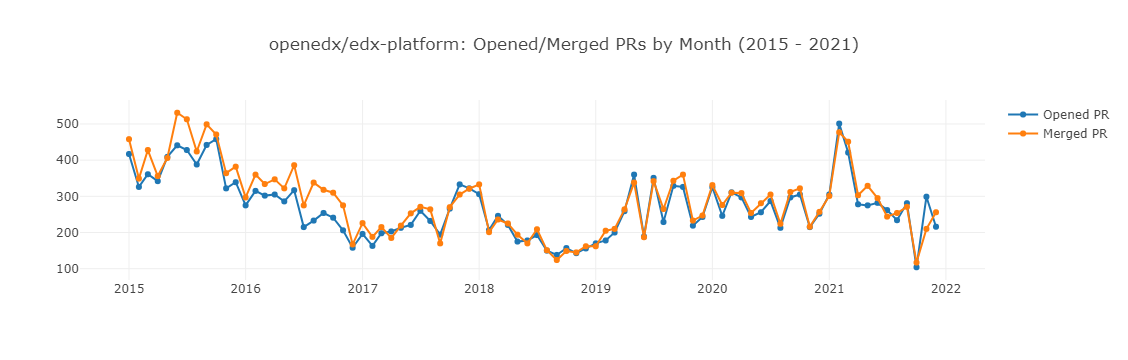

┌─────────┬───────────┬───────────┬───────────┐
│ (index) │   Time    │ Opened PR │ Merged PR │
├─────────┼───────────┼───────────┼───────────┤
│    0    │ '2015-1'  │   '417'   │   '458'   │
│    1    │ '2015-2'  │   '326'   │   '349'   │
│    2    │ '2015-3'  │   '361'   │   '428'   │
│    3    │ '2015-4'  │   '342'   │   '356'   │
│    4    │ '2015-5'  │   '409'   │   '406'   │
│    5    │ '2015-6'  │   '441'   │   '531'   │
│    6    │ '2015-7'  │   '428'   │   '513'   │
│    7    │ '2015-8'  │   '388'   │   '424'   │
│    8    │ '2015-9'  │   '442'   │   '499'   │
│    9    │ '2015-10' │   '458'   │   '471'   │
│   10    │ '2015-11' │   '322'   │   '364'   │
│   11    │ '2015-12' │   '339'   │   '382'   │
│   12    │ '2016-1'  │   '275'   │   '297'   │
│   13    │ '2016-2'  │   '315'   │   '360'   │
│   14    │ '2016-3'  │   '302'   │   '334'   │
│   15    │ '2016-4'  │   '305'   │   '347'   │
│   16    │ '2016-5'  │   '286'   │   '322'   │
│   17    │ '2016-6'  │   '317'   │   '3

In [7]:
query(
        `SELECT 
        sum(if(action='opened',1,0)) as opened_pr, 
        sum(if(pull_merge_commit_sha!='',1,0)) as merged_pr, 
        toYear(created_at) as year, 
        toMonth(created_at) as month 
        FROM ${table_name}
        where (repo_id == ${repo_id})
        and type='PullRequestEvent'
        group by toYear(created_at), toMonth(created_at)
        order by year, month`
).then(data => {
    var pr_opened = [], pr_merged = [], tableArray = []
    data.forEach((d, i) => {
        pr_opened.push(d.opened_pr);
        pr_merged.push(d.merged_pr);
        tableArray.push({"Time": d.year+"-"+d.month, "Opened PR": d.opened_pr,  "Merged PR": d.merged_pr})
    })
   
    // 使用 Plotly 绘图
    plot_opened = {x: timeArray, y: pr_opened, mode: 'lines+markers',  name: 'Opened PR'}
    plot_merged = {x: timeArray, y: pr_merged, mode: 'lines+markers',  name: 'Merged PR'}
    figure_info = {
        title: `openedx/edx-platform: Opened/Merged PRs by Month (${startYear} - ${endYear})`, 
        // yaxis: {type: 'log'}
    }; 
    
    openDigger.render.plotly([plot_opened, plot_merged], figure_info)
         
    // 打印表格
    console.table(tableArray)
});

### 4. Active Developers by month

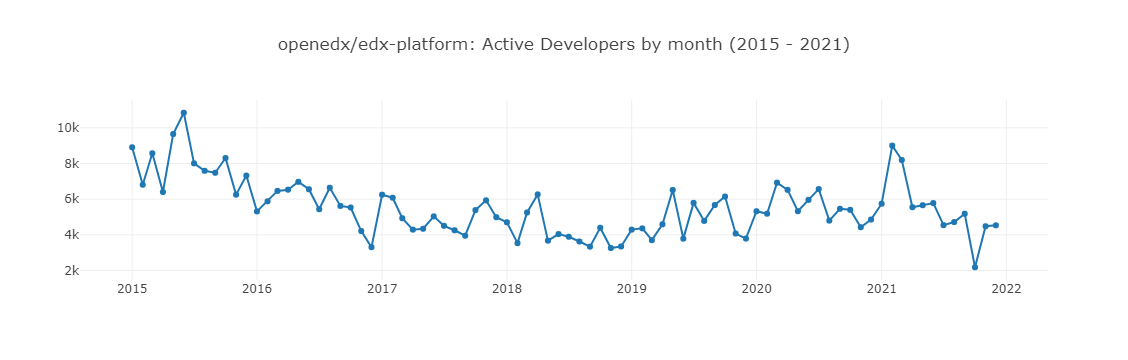

┌─────────┬───────────┬──────────────────┐
│ (index) │   Time    │ Active Developer │
├─────────┼───────────┼──────────────────┤
│    0    │ '2015-1'  │      '8908'      │
│    1    │ '2015-2'  │      '6811'      │
│    2    │ '2015-3'  │      '8571'      │
│    3    │ '2015-4'  │      '6403'      │
│    4    │ '2015-5'  │      '9651'      │
│    5    │ '2015-6'  │     '10845'      │
│    6    │ '2015-7'  │      '8008'      │
│    7    │ '2015-8'  │      '7591'      │
│    8    │ '2015-9'  │      '7480'      │
│    9    │ '2015-10' │      '8306'      │
│   10    │ '2015-11' │      '6254'      │
│   11    │ '2015-12' │      '7322'      │
│   12    │ '2016-1'  │      '5315'      │
│   13    │ '2016-2'  │      '5880'      │
│   14    │ '2016-3'  │      '6463'      │
│   15    │ '2016-4'  │      '6532'      │
│   16    │ '2016-5'  │      '6972'      │
│   17    │ '2016-6'  │      '6556'      │
│   18    │ '2016-7'  │      '5436'      │
│   19    │ '2016-8'  │      '6641'      │
│   20    │

In [8]:
query( 
        `SELECT distinct count(actor_id) as actived_developer,
        toYear(created_at) as year, 
        toMonth(created_at) as month 
        FROM ${table_name}
        where (repo_id == ${repo_id})
        group by toYear(created_at), toMonth(created_at)
        order by year, month`
    ).then(data => {
    // 直接打印数据
    // console.log(data);  
    var actived_developer = [], tableArray = []
    data.forEach((d, i) => {
            actived_developer.push(d.actived_developer);
            tableArray.push({"Time":  d.year+"-"+d.month, "Active Developer": d.actived_developer})
    })
   
    // 使用 Plotly 绘图
    plot_ad = {x: timeArray, y: actived_developer, mode: 'lines+markers',  name: 'The Number of Active Developers'}
    figure_info = {
        title: `openedx/edx-platform: Active Developers by month (${startYear} - ${endYear})`, 
        // yaxis: {type: 'log'}
    }; 
    
    openDigger.render.plotly([plot_ad], figure_info)
         
    // 打印表格
    console.table(tableArray)
});

### 5. Avg time & Median time about an issue from being opened / closed 

In [68]:
// use sub-sql and group by to filter duplicate lines 

function f5() {

    query(  
     `SELECT avg(issue_closed_at - issue_created_at)/(24*60*60) as issue_avg_time, median(issue_closed_at - issue_created_at)/(24*60*60) as issue_median_time
     FROM 
     (
         select issue_created_at,issue_closed_at 
        FROM ${table_name}
        where (repo_id = ${repo_id})
         and (issue_closed_at - issue_created_at) > 0
         group by issue_id, issue_created_at, issue_closed_at
     )`
    ).then(data => {
        // console.log(data)
        console.log("Avg Time(Day): ", data[0].issue_avg_time)
        console.log("Median Time(Day): ", data[0].issue_median_time)
    })
    
};


f5()

Avg Time(Day):  17.67358496646954
Median Time(Day):  1.000318287037037


### 6. Avg time & Median time about an PR from being opened / merged

In [69]:

// use sub-sql and group by to filter duplicate lines 

// maybe lack the data of pr_create_by 


function f6() {

    query(  
     `SELECT avg(end_ - start_)/(24*60*60) as pr_avg_time, median(end_ - start_)/(24*60*60) as pr_median_time
     FROM 
     (
         select max(pull_merged_at) as end_, min(created_at) as start_
        FROM ${table_name}
        where (repo_id = ${repo_id})
         and type='PullRequestEvent'
         group by issue_id
         having toYear(end_) > '1970' 
     )`
    ).then(data => {
        console.log("Avg Time(Day): ", data[0].pr_avg_time)
        console.log("Median Time(Day): ", data[0].pr_median_time)
    })
    
};

f6()

Avg Time(Day):  6.76904254198905
Median Time(Day):  0.9278009259259259


### 7. Avg time & Median time about an PR/Issue from being opened to being replied by other replier not himself/herself.

In [70]:
// 7 Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）

function f7(year) {
    query(  
     `SELECT avg(first_comment_at - issue_created_at)/(24*60*60) as issue_create_comment_avg_time, median(first_comment_at - issue_created_at)/(24*60*60) as issue_create_comment_median_time
     FROM 
     (
         select issue_id, issue_created_at, max(issue_comment_created_at) as first_comment_at
        FROM ${table_name}
        where (repo_id = ${repo_id})
         and toYear(issue_created_at) > '1970'
         and toYear(issue_comment_created_at) > '1970'
         group by issue_id, issue_created_at 
     )`
    ).then(data => {
        console.log(data)
        console.log("Avg Time(Day): ", data[0].issue_create_comment_avg_time)
        console.log("Median Time(Day): ", data[0].issue_create_comment_median_time)
    })
};


f7()

[
  {
    issue_create_comment_avg_time: 19.685569390409327,
    issue_create_comment_median_time: 1.815613425925926
  }
]
Avg Time(Day):  19.685569390409327
Median Time(Day):  1.815613425925926


### 8. Project Release Information

In [32]:
// 版本发布时间

// active对应的是openedx/edx-platform
active_release_name = ["Aspen", "Birch", "Cypress", "Dogwood", "Eucalyptus", "Ficus","Ginkgo", 
                       "Hawthorn", "Ironwood", "Juniper", "Koa", "Lilac","Maple", "Nutmeg"]
active_release_date = ["2014-10-28", "2015-01-29", "2015-07-07", "2015-12-15", "2016-07-13", "2017-01-10", "2017-07-06", 
                       "2018-07-03", "2019-01-17", "2020-05-27", "2020-11-12", "2021-04-09",
                      "2021-10-15"," 2022-04-12"]

//archive对应的是angular/material
archive_release_name = ["v0.4", "v0.6.0", "v1.1.22-rc.0", "v1.1.22", "v1.1.23", "v1.1.24", "v1.2.0-rc.1", "v1.2.0-rc.2",
                       "v1.2.0", "v1.1.25", "v1.1.26", "v1.2.1", "v1.2.2", "v1.2.3", "v1.2.4", "v1.2.5"]
archive_release_date = ["2014-10-06", "2014-12-02", "2020-03-14", "2020-05-01", "2020-07-24", "2020-07-24", "2020-07-24","2020-08-01",
                       "2020-08-04", "2020-09-01","2020-09-06", "2020-09-24", "2020-12-21", "2021-07-15", "2022-01-02", "2022-04-13"]

[
  '2014-10-06', '2014-12-02',
  '2020-03-14', '2020-05-01',
  '2020-07-24', '2020-07-24',
  '2020-07-24', '2020-08-01',
  '2020-08-04', '2020-09-01',
  '2020-09-06', '2020-09-24',
  '2020-12-21', '2021-07-15',
  '2022-01-02', '2022-04-13'
]

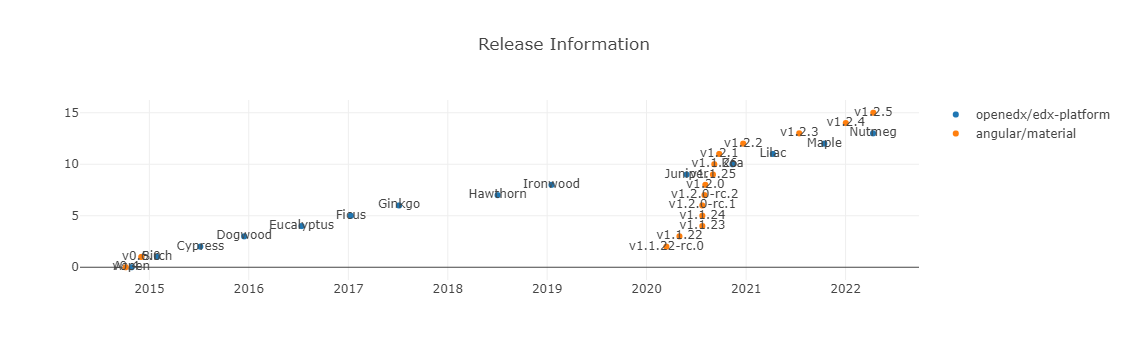

In [44]:
// 使用 Plotly 绘图
// 纵轴无数值含义，仅为错开每个版本的点
plot_active = {x: active_release_date, text: active_release_name, mode: 'markers+text',  name: 'openedx/edx-platform', size: 'petal_length', }
plot_archive = {x: archive_release_date, text: archive_release_name, mode: 'markers+text',  name:  'angular/material', size: 'petal_length', }
figure_info = { 
        title: `Release Information`, 
        // yaxis: {type: 'log'}
    }; 
    
openDigger.render.plotly([plot_active, plot_archive], figure_info)